# Data Generate

In [1]:
from DataGenerate import *

word_pairs, word_pairs_annotations = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:5])

word_list = GetWords()
print("\nFirst 5 Words: ")
word_list[:5]

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
c:\Users\henry\Desktop\MastersProject\quantum_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First 5 Word Pairs: 
[['party', 'government'], ['official', 'leader'], ['state', 'government'], ['control', 'intervention'], ['tax', 'interest']]

First 5 Words: 


['development', 'plan', 'action', 'training', 'education']

# Word2Vec

In [3]:
from CustomClasses.Models import W2VModel

dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))
window = 5

for vector_dims in dimensions: W2VModel(vector_dims, window, printing=True)

W2V = W2VModel(768, 5)
print("First 10 dims of second word in 768 dims: ")
W2V.getvector(word_list[1])[:10]

Load Word2Vec Model of  10  dimensions and  5  window
Load Word2Vec Model of  20  dimensions and  5  window
Load Word2Vec Model of  30  dimensions and  5  window
Load Word2Vec Model of  40  dimensions and  5  window
Load Word2Vec Model of  50  dimensions and  5  window
Load Word2Vec Model of  60  dimensions and  5  window
Load Word2Vec Model of  70  dimensions and  5  window
Load Word2Vec Model of  80  dimensions and  5  window
Load Word2Vec Model of  90  dimensions and  5  window
Load Word2Vec Model of  100  dimensions and  5  window
Load Word2Vec Model of  200  dimensions and  5  window
Load Word2Vec Model of  300  dimensions and  5  window
Load Word2Vec Model of  400  dimensions and  5  window
Load Word2Vec Model of  500  dimensions and  5  window
Load Word2Vec Model of  600  dimensions and  5  window
Load Word2Vec Model of  700  dimensions and  5  window
First 10 dims of second word in 768 dims: 


array([-0.10302368, -0.09444601, -0.03695932,  0.07197664,  0.03619299,
       -0.08959707, -0.11913428, -0.04251401, -0.14098454,  0.02292801],
      dtype=float32)

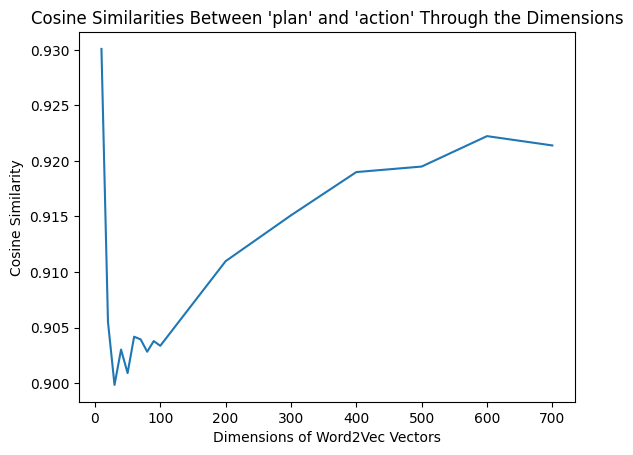

In [6]:
def PlotWord2VecThroughDims(word1, word2):
	dot_prds = []
	for dims in dimensions:
		model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims)+"_5")
		dim_dot_prod = []
		dim_dot_prod.append(1-cosine(model.wv[word1],model.wv[word2]))
		dot_prds.append(dim_dot_prod)
	dot_prods = np.array(dot_prds)
	plt.plot(dimensions, dot_prods)
	plt.title("Cosine Similarities Between '"+ word1+ "' and '"+ word2+ "' Through the Dimensions")
	plt.ylabel("Cosine Similarity")
	plt.xlabel("Dimensions of Word2Vec Vectors")
	plt.savefig('Cosine_Similarities_Between_'+ word1+ '_and_'+ word2+ '_Through_the_Dimensions.png')
	plt.show()
	return

PlotWord2VecThroughDims(word_list[1], word_list[2])

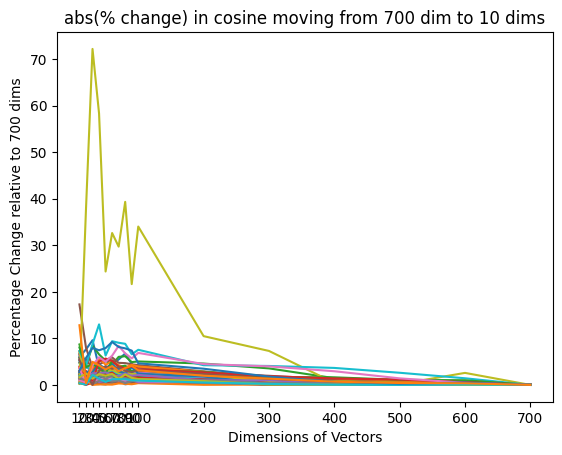

In [ ]:
def PlotAllPairsThroughDims():
	#Similarities through dimensions
	dim_similarities = []
	for dims in dimensions:
		model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
		dim_specific_similarities = []
		for pair in word_pairs:
			dim_specific_similarities.append(1-cosine(model.wv[pair[0]],model.wv[pair[1]]))
		dim_similarities.append(dim_specific_similarities)
	dim_similarities = np.array(dim_similarities).T #Transpose makes the first index a series of similarities for the same word pair through dimensions

	#Scale similarities to get absolute error from 700 dims
	for pair_index, pair_similarity_series in enumerate(dim_similarities):
		for sim_index, sim in enumerate(pair_similarity_series):
			if sim_index == len(pair_similarity_series)-1: dim_similarities[pair_index, sim_index] = 0
			else:
				dim_similarities[pair_index, sim_index] = abs(100* (sim - dim_similarities[pair_index, -1]) / dim_similarities[pair_index, -1])

		plt.plot(dimensions, dim_similarities[pair_index])
	plt.title("abs(% change) in cosine moving from 700 dim to 10 dims")
	plt.xticks(dimensions)
	plt.xlabel("Dimensions of Vectors")
	plt.ylabel("Percentage Change relative to 700 dims")
	plt.savefig('abs(% change) in cosine moving from 700 dim to 10 dims.png')
	plt.show()
	return 

PlotAllPairsThroughDims()

In [ ]:
from scipy.stats import spearmanr

W2V_768 = W2VModel(768)

corrs, BERT_similarities = [], []
#print(len(word_pairs))
all_dim_sims = []
for dim in dimensions:
	W2V_similarities = []
	W2V_dim = W2VModel(dim, printing=False)
	for pair in word_pairs:
		W2V_similarities.append(1-cosine(W2V_dim.getvector(pair[0]), W2V_dim.getvector(pair[1])))
	all_dim_sims.append(W2V_similarities)
	#print(len(word_pairs_annotations), len(W2V_similarities))
	corrs.append([spearmanr(word_pairs_annotations, W2V_similarities)[0], spearmanr(word_pairs_annotations, W2V_similarities)[1]])

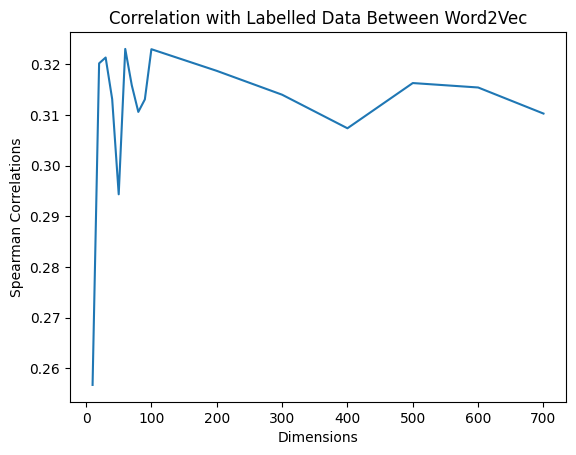

In [ ]:
plt.title("Correlation with Labelled Data Between Word2Vec")
plt.xlabel("Dimensions")
plt.ylabel("Spearman Correlations")
plt.plot(dimensions, np.array(corrs)[:, 0])

# Correlation with window and changes:

In [ ]:
from CustomClasses.Models import W2VModel

dimensions = [10,50] + list(np.arange(100,800,100))
windows = [2,5,10,20,50]
window = 5

for vector_dims in dimensions: 
	for window in windows:
		W2VModel(vector_dims, window, printing=True)

In [101]:
windows = [2,5,10,20,50]

def compare_dims_windows():
	#Similarities through dimensions
	dim_similarities = np.zeros(shape=(len(dimensions), len(windows), 4),  dtype=object)
	i = -1
	for dims in reversed(dimensions):
		i += 1
		window_sims = []
		for j, window in enumerate(windows):
			model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims)+str(window))
			similatities = []
			for pair in word_pairs:
				sim = 1-cosine(model.wv[pair[0]],model.wv[pair[1]])
				similatities.append(sim)

			similatities = np.array(similatities)/np.array(similatities[0])
			dim_similarities[i, j, 0] = similatities
			dim_similarities[i, j, 1] = similatities.mean()
			dim_similarities[i, j, 2] = similatities.max()
			dim_similarities[i, j, 3] = similatities.std()
	return dim_similarities

a = compare_dims_windows()

In [165]:
a.mean(axis=1)[:,0].shape

(9,)

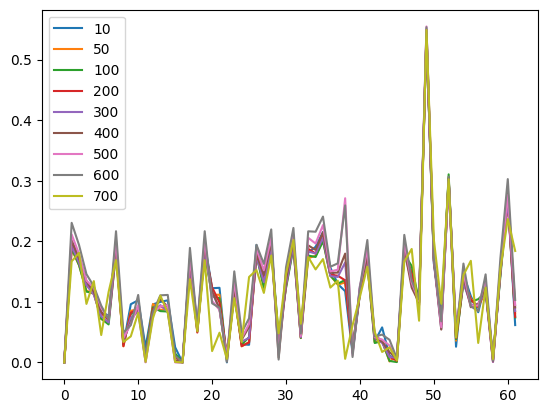

In [173]:
for i in range(len(dimensions)):
	plt.plot(abs(a.mean(axis=1)[i,0]-1), label=str(dimensions[i]))
plt.legend()

In [189]:
for i in range(len(dimensions)):
	plt.plot(dimensions, abs(a.mean(axis=3)[i,0]-1), label=str(dimensions[i]))
plt.legend()

AxisError: axis 3 is out of bounds for array of dimension 3

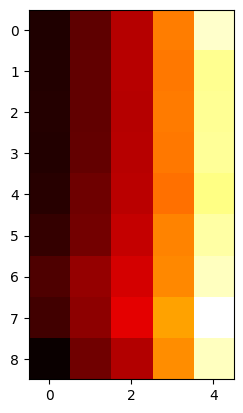

In [111]:
plt.imshow(a[:,:,3].astype(float), cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()